In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.optimize import minimize
sns.set()

# Download Dataset

In [16]:
tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
etf = yf.Tickers(tickers)
data = etf.history(start='2010-01-01', actions = False)
data.drop(['Open','High','Low','Volume'],inplace=True, axis=1)
data = data.droplevel(0,axis=1).resample('m').last()
data

[*********************100%***********************]  9 of 9 completed
/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_11736/3754661904.py:5: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.droplevel(0,axis=1).resample('m').last()


Ticker,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,
2010-01-31 00:00:00+00:00,22.024282,33.847130,8.866618,20.734482,17.080418,17.734261,17.754032,24.451872,24.071119
2010-02-28 00:00:00+00:00,23.018076,34.865654,9.179265,21.840126,17.675299,18.296070,17.519552,24.545671,25.411648
2010-03-31 00:00:00+00:00,24.840227,35.847759,9.996119,23.738672,18.884251,18.985352,17.990932,25.200397,27.395496
2010-04-30 00:00:00+00:00,24.891493,37.337276,10.127729,24.749317,19.121326,18.781424,18.464058,24.219995,29.047255
2010-05-31 00:00:00+00:00,22.518784,33.061966,9.200189,22.492477,17.690699,17.911352,17.445015,22.643497,27.003424
...,...,...,...,...,...,...,...,...,...
2024-05-31 00:00:00+00:00,91.096039,92.457512,41.475777,123.087158,209.791962,76.760468,72.138367,143.139130,175.592255
2024-06-30 00:00:00+00:00,88.309998,91.150002,41.110001,121.870003,226.229996,76.580002,68.139999,145.750000,182.399994
2024-07-31 00:00:00+00:00,92.139999,93.209999,43.740002,127.860001,218.800003,77.849998,72.790001,149.630005,187.490005


In [17]:
rets = data.pct_change().fillna(0)
rets

Ticker,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,
2010-01-31 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-02-28 00:00:00+00:00,0.045123,0.030092,0.035261,0.053324,0.034828,0.031679,-0.013207,0.003836,0.055690
2010-03-31 00:00:00+00:00,0.079162,0.028168,0.088989,0.086929,0.068398,0.037674,0.026906,0.026674,0.078068
2010-04-30 00:00:00+00:00,0.002064,0.041551,0.013166,0.042574,0.012554,-0.010741,0.026298,-0.038904,0.060293
2010-05-31 00:00:00+00:00,-0.095322,-0.114505,-0.091584,-0.091188,-0.074818,-0.046326,-0.055191,-0.065091,-0.070362
...,...,...,...,...,...,...,...,...,...
2024-05-31 00:00:00+00:00,0.032720,-0.003422,0.031715,0.016376,0.070770,0.024371,0.089602,0.024015,0.001993
2024-06-30 00:00:00+00:00,-0.030584,-0.014142,-0.008819,-0.009889,0.078354,-0.002351,-0.055426,0.018240,0.038770
2024-07-31 00:00:00+00:00,0.043370,0.022600,0.063975,0.049151,-0.032843,0.016584,0.068242,0.026621,0.027906


In [18]:
pal = sns.color_palette('Spectral', len(tickers))
pal

[(0.8310649750096117, 0.23844675124951936, 0.30880430603613995),
 (0.9568627450980393, 0.42745098039215684, 0.2627450980392157),
 (0.9914648212226067, 0.677354863514033, 0.37808535178777386),
 (0.996078431372549, 0.8784313725490196, 0.5450980392156862),
 (0.998077662437524, 0.9992310649750096, 0.7460207612456747),
 (0.9019607843137256, 0.9607843137254902, 0.5960784313725491),
 (0.6652825836216842, 0.8645905420991927, 0.6432141484044599),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.19946174548250672, 0.5289504036908881, 0.7391003460207612)]

## Minimize PF Volatility

In [19]:
noa = rets.shape[1]
init_guess = np.repeat(1/noa, noa)
cov = rets.cov() * 12
bounds = ((0.0, 1.0), ) * noa

weights_sum_to_1 = {'type': 'eq',
                    'fun': lambda weights: np.sum(weights) - 1}

# Subject Func. PF's Vol
def port_vol(weights, cov):
    vol = np.sqrt(weights.T @ cov @ weights)
    return vol

# Optimization
res = minimize(port_vol,
               init_guess,
               args=(cov),
               method='SLSQP',
               constraints=(weights_sum_to_1,),
               bounds=bounds)

weights = res.x

In [20]:
weights_df = pd.Series(np.round(weights, 3), index=tickers)
weights_df = weights_df[weights_df > 0.0]


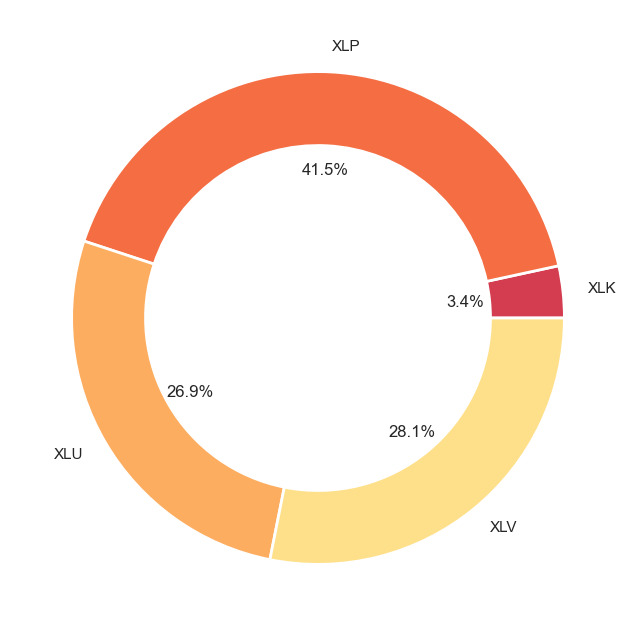

In [21]:
plt.figure(figsize=(8, 8))
wedgeprops = {'width': 0.3, 'edgecolor': 'w', 'linewidth': 2}
plt.pie(weights_df, labels=weights_df.index, autopct='%.1f%%', wedgeprops=wedgeprops, colors=pal)
plt.show()

In [22]:
cov.shape

(9, 9)

In [23]:
def get_gmv_weights(cov):

    # 자산 개수
    noa = cov.shape[0]

    # 초기 가중치
    init_guess = np.repeat(1/noa, noa)

    # 제약조건 및 상하한값
    bounds = ((0.0, 1.0), ) * noa
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1}

    # 목적함수: 포트폴리오 변동성
    def port_vol(weights, cov):
        vol = np.sqrt(weights.T @ cov @ weights)
        return vol

    # 최적화 수행
    res = minimize(port_vol,
                   init_guess,
                   args=(cov),
                   method='SLSQP',
                   constraints=(weights_sum_to_1,),
                   bounds=bounds)
    
    return res.x

In [24]:
gmv_w_df = pd.DataFrame().reindex_like(rets)

# 공분산행렬에 대한 3차원 배열 생성
cov = rets.rolling(12).cov().fillna(0) * 12
cov = cov.values.reshape(int(cov.shape[0] / cov.shape[1]), cov.shape[1], cov.shape[1])

# 가중치 계산
for i in range(12, len(gmv_w_df)):
    gmv_w_df.iloc[i] = get_gmv_weights(cov[i-1])

Text(0, 0.5, 'Weights')

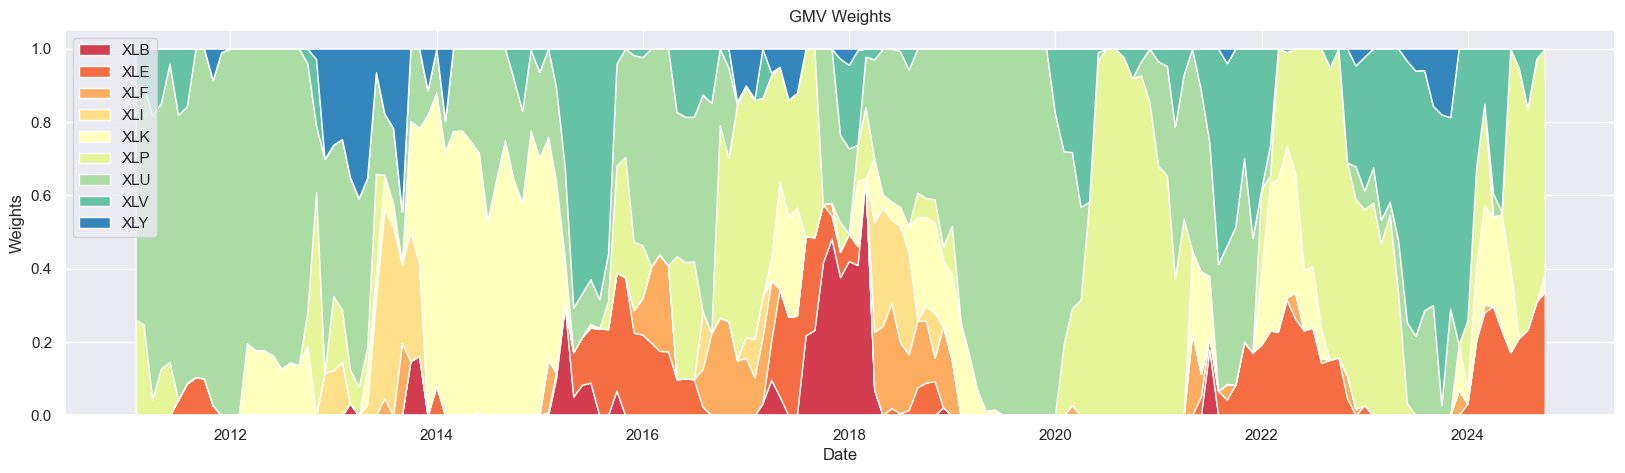

In [25]:
plt.figure(figsize=(20, 5))
plt.stackplot(gmv_w_df.index, gmv_w_df.T, labels=gmv_w_df.columns, colors=pal)
plt.legend(loc='upper left')
plt.title('GMV Weights')
plt.xlabel('Date')
plt.ylabel('Weights')

Text(0, 0.5, 'Returns')

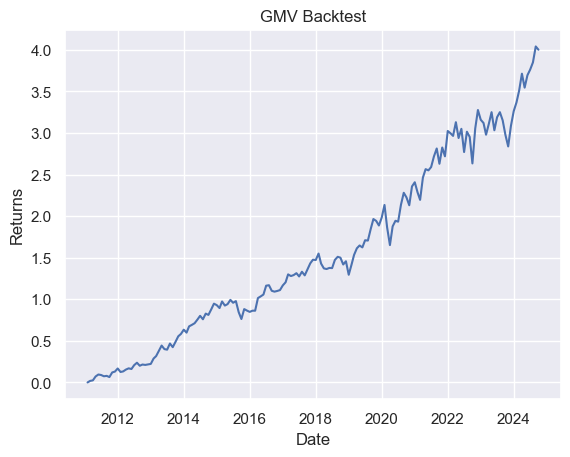

In [26]:
# GMV 포트폴리오 수익률
port_rets = gmv_w_df.shift() * rets
port_cum_rets = (1 + port_rets.sum(axis=1)).cumprod() - 1

# 포트폴리오 백테스팅 결과 그래프
plt.plot(port_cum_rets.iloc[12:])
plt.title('GMV Backtest')
plt.xlabel('Date')
plt.ylabel('Returns')